# Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DIBIMBING - DATA SCIENCE/Day 18-Exploring Machine Learning Models with Python (Supervised) - Part II

/content/drive/MyDrive/DIBIMBING - DATA SCIENCE/Day 18-Exploring Machine Learning Models with Python (Supervised) - Part II


In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Preprocessing

In [ ]:
# Look if there's data null #
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Lookup data duplicate #
df.duplicated().sum() 

0

In [ ]:
# Check spasi in field #
df[df['TotalCharges'].str.contains(pat=' ', case=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There's no null and duplicate data but found out that there's space characer in column "Total Charges". Therefore, need to exclude it.

In [ ]:
# Handling missing value -> exclude space #
df = df.loc[~df['TotalCharges'].str.contains(' ')]

In [ ]:
# Transform Total Charges into float #
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
# group column names based on type #
categoricals = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

numericals = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

Value counts of OnlineBackup column
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

Value counts of DeviceProtection column
N

## Handling Outliers Data

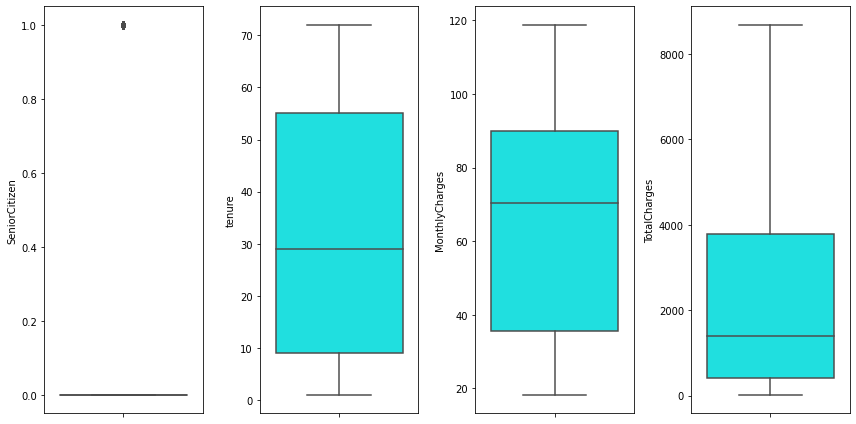

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

Obervation:
1. There is no outlier in the in the column tenure, Monthly Charges, and TotalCharges
2. SeniorCitizen column is boolean/binary column since the value is 0 or 1. There is no variance data in quartile 1, 2 and 3, therefore, no need to conclude its simmetricity.

Therefore, can continue to another step.

## Handling Multicolinerity

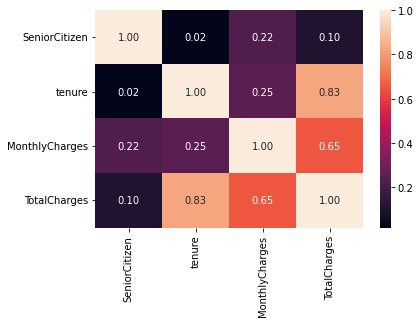

In [ ]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation :
1. Total Charges and Tenure are highly correlated each other, therefore when there's change in tenure, it will changes the total charges too.
2. we can choose only 1 of Total Charges or Tenure to modelling process : Drop tenure


In [ ]:
# Drop Tenure (bcs of high correlation) #
df = df.drop('tenure', axis=1)

In [ ]:
# Lookup the data #
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Column "tenure" successfully drop

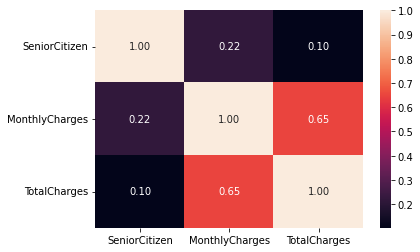

In [ ]:
# correlation heatmap after drop 'tenure' #
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

There's no multicolinearity, therefore can continue to another step

## Label Encoding

### Contract

In [ ]:
# Label encoding on value of column "Contract" #
contract_class = {'Month-to-month':1,
             'One year':2,
             'Two year':3}
df['contract_class'] = df['Contract'].map(contract_class)
df[['Contract','contract_class']].head()

,Contract,contract_class
0,Month-to-month,1
1,One year,2
2,Month-to-month,1
3,One year,2
4,Month-to-month,1


In [ ]:
# Lookup unique value of column "Contract" #
df[['Contract','contract_class']].drop_duplicates()

,Contract,contract_class
0,Month-to-month,1
1,One year,2
11,Two year,3


Therefore, successfully encoded for contract below.

1 = month-to-month

2 = one year

3 = two year

### Internet Service

In [ ]:
# Label encoding on value of column "InternetService" #
le = preprocessing.LabelEncoder()
le.fit(df['InternetService'])
df['InternetService_label_encoding'] = le.transform(df['InternetService']) 

In [ ]:
# Label encoding on value of column "InternetService" #
InternetService_label_encoding = df[['InternetService','InternetService_label_encoding',]]
InternetService_label_encoding.head()

,InternetService,InternetService_label_encoding
0,DSL,0
1,DSL,0
2,DSL,0
3,DSL,0
4,Fiber optic,1


In [ ]:
# Lookup unique value of column "InternetService"#
InternetService_label_encoding.drop_duplicates()

,InternetService,InternetService_label_encoding
0,DSL,0
4,Fiber optic,1
11,No,2


Therefore, successfully encoded for Internet Services below.

0 = DSL

1 = Fiber Optic

2 = No

### Churn

In [ ]:
# Label encoding on value of column "Churn" #
le = preprocessing.LabelEncoder()
le.fit(df['Churn'])
df['Churn_label_encoding'] = le.transform(df['Churn']) 

In [ ]:
# Label encoding on value of column "Churn" #
Churn_label_encoding = df[['Churn','Churn_label_encoding',]]
Churn_label_encoding.head()

,Churn,Churn_label_encoding
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1


In [ ]:
Churn_label_encoding.drop_duplicates()

,Churn,Churn_label_encoding
0,No,0
2,Yes,1


Therefore, successfully encoded for Churn below.

0 = No

1 = Yes

In [ ]:
# Lookup the data after encoded #
df 

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,contract_class,InternetService_label_encoding,Churn_label_encoding
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,2,0,0
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0,1
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2,0,0
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,2,0,0
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,2,1,0
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1,0,0
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1,1,1


## Split Data

Target = Churn_label_encoding

Feature = 'SeniorCitizen','contract_class', 'PhoneService_label_encoding', 'InternetService_label_encoding', 'TechSupport_label_encoding'

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = df[['SeniorCitizen','contract_class', 'InternetService_label_encoding']]
target = df[['Churn_label_encoding']]

feature_churn_train, feature_churn_test, target_churn_train, target_churn_test = train_test_split(feature, target, test_size=0.20, random_state=42)

## Imbalanced Data

In [ ]:
target1 = target_churn_train['Churn_label_encoding'].value_counts().reset_index()
target1.rename(columns={'index':'Churn_label_encoding','Churn_label_encoding':'freq'}, inplace=True)
target1['percentage'] = round((target1['freq']/target1['freq'].sum())*100,2)
target1

,Churn_label_encoding,freq,percentage
0,0,4130,73.42
1,1,1495,26.58


Observation :

0 = No for 73,42%

1 = Yes for 26,58%

There's imbalance data of telco churn that indicate only 26,58 % churn on telco subscription

In [ ]:
df_numeric = df[['SeniorCitizen','contract_class', 'InternetService_label_encoding','Churn_label_encoding']]
df_numeric = df_numeric.dropna()
df_numeric.head()

,SeniorCitizen,contract_class,InternetService_label_encoding,Churn_label_encoding
0,0,1,0,0
1,0,2,0,0
2,0,1,0,1
3,0,2,0,0
4,0,1,1,1


In [ ]:
df_numeric['Churn_label_encoding'].value_counts()

0    5163
1    1869
Name: Churn_label_encoding, dtype: int64

For looking up the data to reflect the real data, therefore there's no followup action for imbalanced data

# Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

Bebas menggunakan model, mau menggunakan decision tree, random forest, xgboost, dll juga boleh<br><br>
silahkan berekspresi :)

## Decision Tree

In [ ]:
from sklearn import tree
from sklearn import datasets
from sklearn.tree import plot_tree 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
dt = DecisionTreeClassifier(random_state=1234)
model = dt.fit(feature_churn_train, target_churn_train)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(feature_churn_train, target_churn_train)

KNeighborsClassifier()

## Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(feature_churn_train, target_churn_train)

LogisticRegression(random_state=42)

## Random Forest

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(feature_churn_train, target_churn_train)


RandomForestClassifier(random_state=42)

# Evaluation

pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [ ]:
y_pred_knn = knn.predict(feature_churn_test)

y_pred_reg = logreg.predict(feature_churn_test)

y_pred_dt = dt.predict(feature_churn_test)

y_pred_rf = model.predict(feature_churn_test)

Because of imbalance data, will use AUC, recall and precission to evaluate the model and choose the best one.

##KNN

In [ ]:
#Confusion metrix for KNN #
cm = confusion_matrix(target_churn_test, y_pred_knn)
cm

array([[800, 233],
       [138, 236]])

In [ ]:
# calculate AUC
print('AUC for KNN is',roc_auc_score(target_churn_test, y_pred_knn))


AUC for KNN is 0.7027297058047015


In [ ]:
# calculate F1 Score
print('F1 Score for KNN ',f1_score(target_churn_test, y_pred_knn))


F1 Score for KNN  0.5599051008303676


In [ ]:
# calculate Precision
print('Precision for KNN ',precision_score(target_churn_test, y_pred_knn))

Precision for KNN  0.5031982942430704


In [ ]:
# calculate Recall
print('Recall for KNN',recall_score(target_churn_test, y_pred_knn))


Recall for KNN 0.6310160427807486


## Logistic Reggression

In [ ]:
#Confusion metrix for logreg #
cm = confusion_matrix(target_churn_test, y_pred_reg)
cm

array([[946,  87],
       [295,  79]])

In [ ]:
# calculate AUC
print('AUC for LogReg is',roc_auc_score(target_churn_test, y_pred_reg))


AUC for LogReg is 0.563504615081974


In [ ]:
# calculate F1 Score
print('F1 Score for LogReg is',f1_score(target_churn_test, y_pred_reg))


F1 Score for LogReg is 0.2925925925925926


In [ ]:
# calculate Precision
print('Precision for LogReg is',precision_score(target_churn_test,y_pred_reg))

Precision for LogReg is 0.4759036144578313


In [ ]:
# calculate Recall
print('Recall for LogReg is',recall_score(target_churn_test, y_pred_reg))


Recall for LogReg is 0.21122994652406418


## Decision tree

In [ ]:
#Confusion metrix for logreg #
cm = confusion_matrix(target_churn_test, y_pred_dt)
cm

array([[818, 215],
       [149, 225]])

In [ ]:
# calculate AUC
print('AUC for Decision Tree is',roc_auc_score(target_churn_test, y_pred_dt))


AUC for Decision Tree is 0.6967363113510827


In [ ]:
# calculate F1 Score
print('F1 Score for Decision Tree is',f1_score(target_churn_test, y_pred_dt))


F1 Score for Decision Tree is 0.5528255528255529


In [ ]:
# calculate Precision
print('Precision for Decision Tree is',precision_score(target_churn_test,y_pred_dt))

Precision for Decision Tree is 0.5113636363636364


In [ ]:
# calculate Recall
print('Recall for Decision Tree is',recall_score(target_churn_test, y_pred_dt))


Recall for Decision Tree is 0.6016042780748663


## Random Forest

Because of imbalance data, for calculate the accuracy, next using AUC, F1 Score, Precission and Recall

In [ ]:
cm = confusion_matrix(target_churn_test, y_pred_rf)
cm

array([[818, 215],
       [149, 225]])

In [ ]:
# calculate AUC
print('AUC for random forest',roc_auc_score(target_churn_test, y_pred_rf))


AUC for random forest 0.6967363113510827


In [ ]:
# calculate F1 Score
print('F1 Score for random forest',f1_score(target_churn_test, y_pred_rf))


F1 Score for random forest 0.5528255528255529


In [ ]:
# calculate Precision
print('Precision for random forest',precision_score(target_churn_test, y_pred_rf))


Precision for random forest 0.5113636363636364


In [ ]:
# calculate Recall
print('Recall for random forest',recall_score(target_churn_test, y_pred_rf))


Recall for random forest 0.6016042780748663


Observation :

For random forest, Decision Tree, and Logistic Regression has small AUC (accuracy) and F1 score, therefore not use for modelling.

The biggest accuracy is KNN ( AUC = 70,12%) , therefore will interpret the KNN

# Model Interpretation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

list_acc = []
for i in range(1,20):
    print()

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(feature_churn_train, target_churn_train)
    
    y_pred_knn = knn.predict(feature_churn_test)
    list_acc.append(accuracy_score(target_churn_test, y_pred_knn))

In [ ]:
list_acc

[0.689410092395167,
 0.7341862117981521,
 0.7327647476901208,
 0.7270788912579957,
 0.736318407960199,
 0.7327647476901208,
 0.7327647476901208,
 0.7327647476901208,
 0.7306325515280739,
 0.7306325515280739,
 0.7341862117981521,
 0.736318407960199,
 0.736318407960199,
 0.736318407960199,
 0.7341862117981521,
 0.736318407960199,
 0.736318407960199,
 0.7327647476901208,
 0.736318407960199]

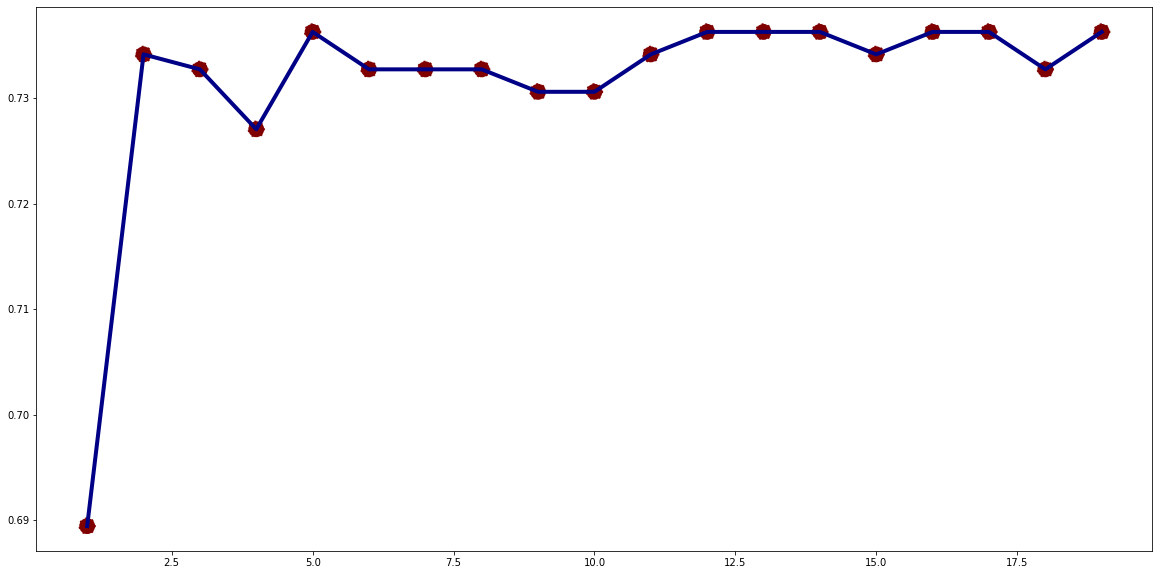

In [ ]:
plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 20), y=list_acc, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 20), y=list_acc, s=300, color='#800000',  linestyle='--')

Observation :
1. The distance of the accuracy not really big, therefore indicate that senior citizen, internet service and contract class are important variable in churn/not the customers is.


# Business Solution

From the observation and research, we suggest as below.
1. Company can offer special bundling offer to attract customer on subscribe both phone service and internet service. That will increase company's revenue.
2. Because there's still a customer with subscription contract month-to-month, therefore company can offer the customer with reasonable discount if the customer subscribe telco in contract 2 years. It also can reduce the possibility of customer to move to another brand. That will increase company's revenue and keep the customer loyal to company.
3. If the customer can't pay directly for 2 years contract, therefore company can offer for longer tenure which is will increase the total charge to customer. That will increase company's revenue.

Of course, all of the suggestion must be followed by the quality of company in giving their product services and make the customer comfort by listening suggestion and improve in every aspect.